# Seaborn

## Distribution Plots

In [43]:
import seaborn as sn
import numpy as np
%matplotlib inline

In [10]:
tips = sn.load_dataset('tips')

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


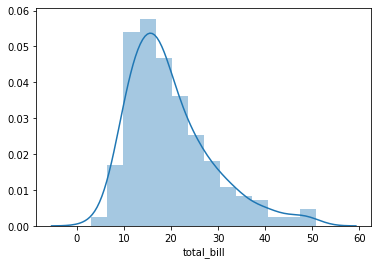

In [18]:
sn.distplot(tips['total_bill'])

The line is kde, kernel density distribution, to remove it pass kde=False

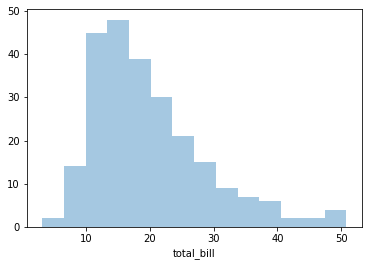

In [19]:
sn.distplot(tips['total_bill'],kde=False)

To check more details pass parameter bins with appropriate value, which depends on the dataset

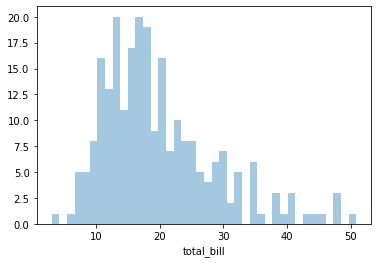

In [24]:
sn.distplot(tips['total_bill'],kde=False,bins=40)

### Joint Plot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

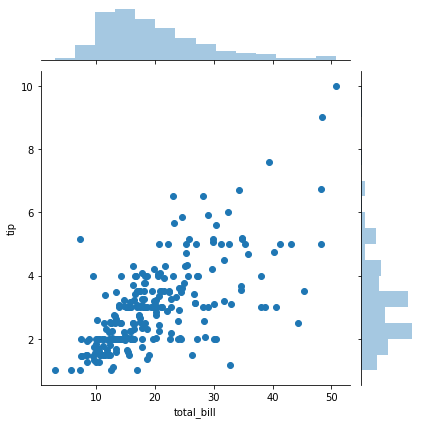

In [28]:
sn.jointplot(x='total_bill',y='tip',data=tips)

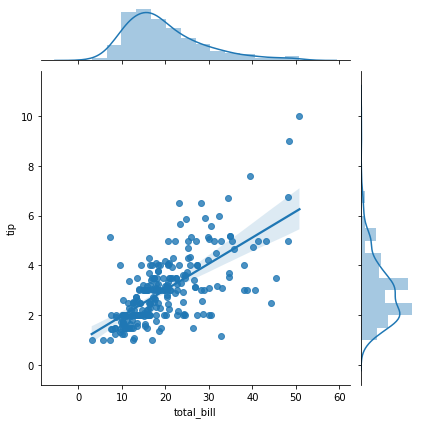

In [30]:
sn.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

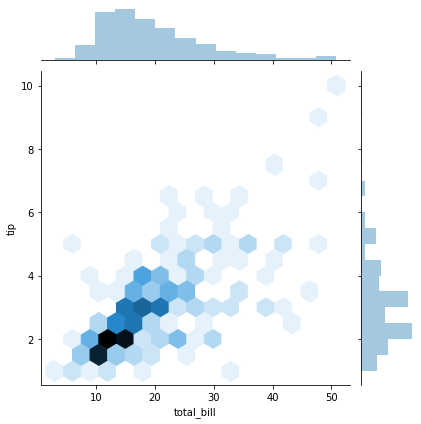

In [33]:
sn.jointplot(x='total_bill',y='tip',data=tips,kind ='hex')

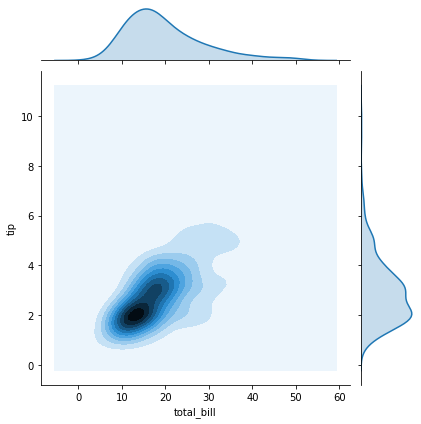

In [34]:
sn.jointplot(x='total_bill',y='tip',data=tips,kind ='kde')

### Pair Plot

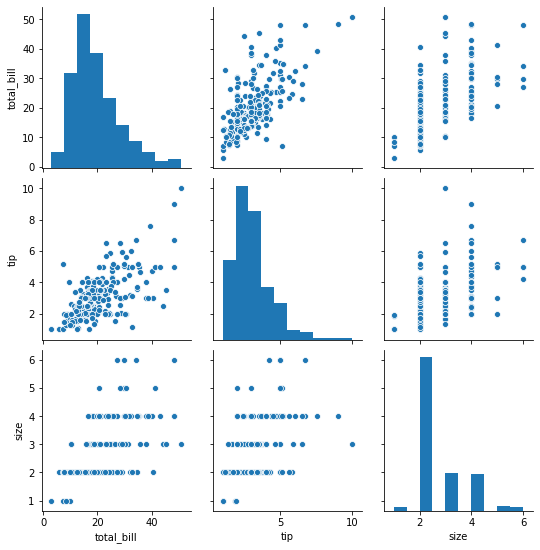

In [35]:
sn.pairplot(tips)

For categorical data we can pass hue paramter to distinguish the visualized data by categories

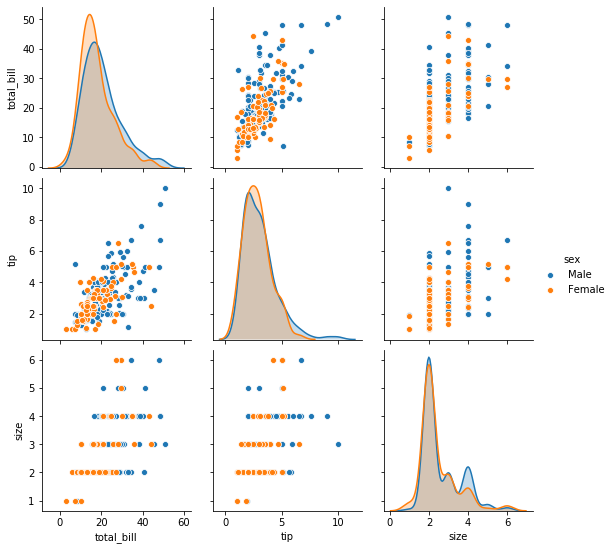

In [36]:
sn.pairplot(tips,hue='sex')

### Rug Plot
It just marks a dash on every univariate distribution

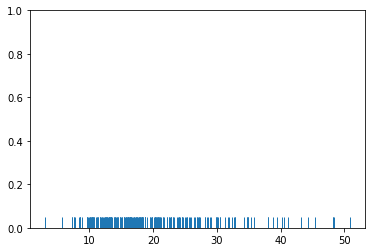

In [38]:
sn.rugplot(tips['total_bill'])

The kde can be drawn easily using rug plot or distribution plot as:
the normal curve is drawn for each dashes, i.e each univariate ditribution, then all those normal distributions are summed together to get a kde

### KDE Plot

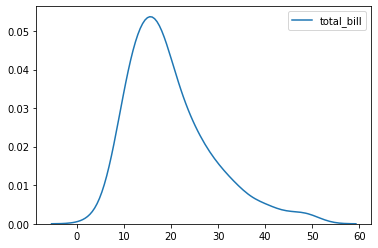

In [39]:
sn.kdeplot(tips['total_bill'])

## Categorical Plot

### Bar Plot
We can pass estimator parameter to pass various functions like std or any user defined function to visualize that data<br>
By default it shows average/mean of the y axes

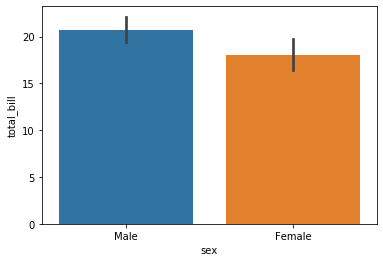

In [40]:
sn.barplot(x='sex',y='total_bill',data=tips)

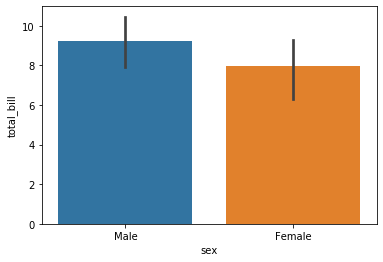

In [44]:
sn.barplot(x='sex',y='total_bill',data=tips,estimator = np.std)

### Count Plot

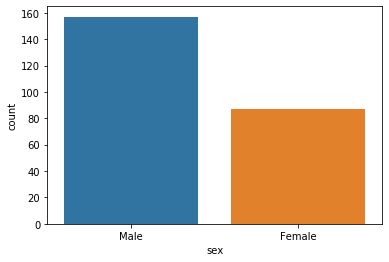

In [42]:
sn.countplot(x='sex',data=tips)

### Box Plots
The box basically shows the quartiles of the data, and the line in the box shows the mean value of that particular category

In [46]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


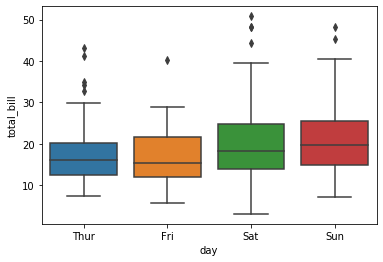

In [45]:
sn.boxplot(x='day',y='total_bill',data=tips)

To further categorize them we can add hue parameter like follows

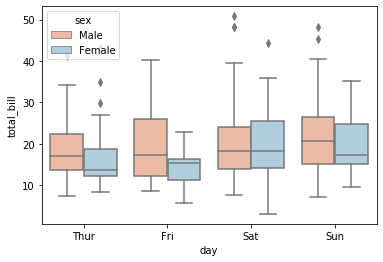

In [51]:
sn.boxplot(x='day',y='total_bill',data=tips,hue='sex',palette='RdBu')

### Violin Plot
The violin plot basically shows the underlying kde of each distribution over the data points

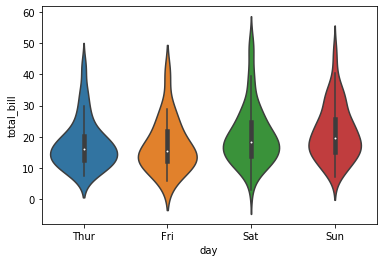

In [53]:
sn.violinplot(x='day',y='total_bill',data=tips)

Similar of the box plot we can add hue to compare of another category

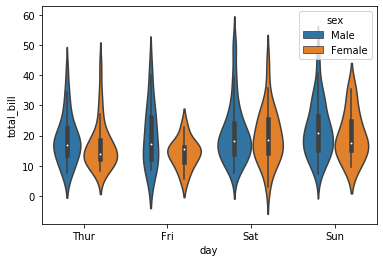

In [55]:
sn.violinplot(x='day',y='total_bill',data=tips,hue='sex')

We can directly compare these two hues if we pass another parameter split and set its value to true

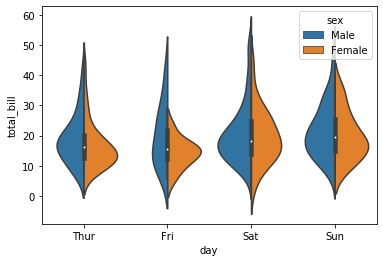

In [59]:
sn.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

### Strip Plot
Strip plot is scatter plot with categories

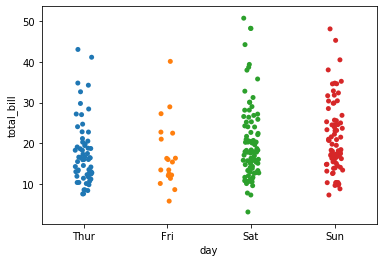

In [62]:
sn.stripplot(x='day',y='total_bill',data=tips)

We can add hue and split in this plot too
<br>Note that split is renamed as dodge in new seaborn versions

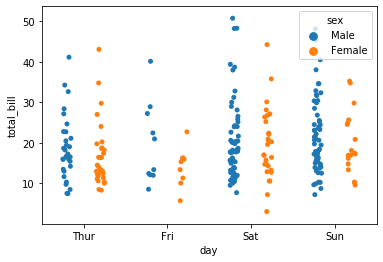

In [65]:
sn.stripplot(x='day',y='total_bill',data=tips,hue='sex',dodge=True)

### Swarm Plot
It is combination of strip plot and violin plot, to prevent overlapping basically.

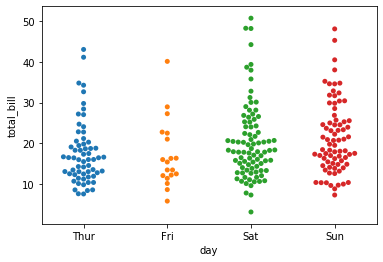

In [66]:
sn.swarmplot(x='day',y='total_bill',data=tips)

We can actually combine swarmplot and violin plot like follows:

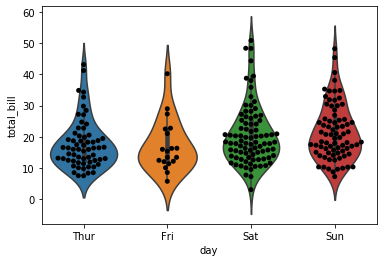

In [71]:
sn.violinplot(x='day',y='total_bill',data=tips)
sn.swarmplot(x='day',y='total_bill',data=tips,color='black')

### Factor Plot
This is general plot and pass kind parameter to create any plot you want to show

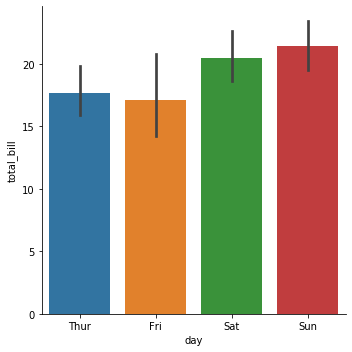

In [74]:
sn.factorplot(x='day',y='total_bill',data=tips,kind='bar')

C:\Users\ImSahil\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


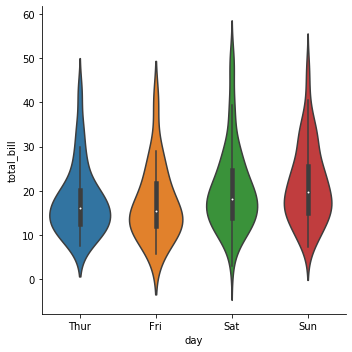

In [75]:
sn.factorplot(x='day',y='total_bill',data=tips,kind='violin')

## Matrix Plots

In [86]:
flights = sn.load_dataset('flights')

### Heatmaps
To create heatmaps, we are supposed to get the data in matrix form so that all the data is somehow related to each other

In [104]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


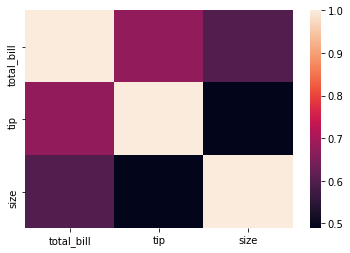

In [84]:
sn.heatmap(tips.corr())

We can annotate the heatmap by adding annot parameter by setting it true

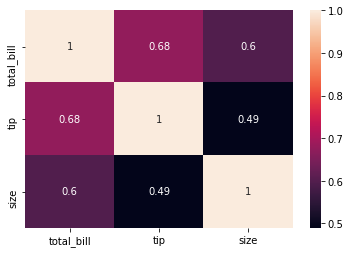

In [85]:
sn.heatmap(tips.corr(),annot=True)

In [87]:
flights.head() 

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [96]:
flight_pivot = flights.pivot_table(index='month',columns='year',values='passengers')

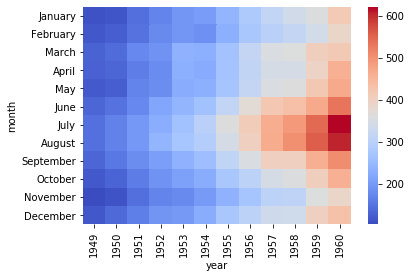

In [99]:
sn.heatmap(flight_pivot,cmap='coolwarm')

- Inserting Lines in between the boxes

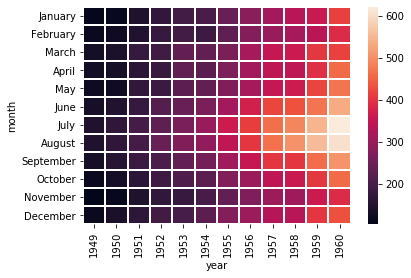

In [103]:
sn.heatmap(flight_pivot,linecolor='white',linewidth=1)

### Cluster Map
This is heirarchical clustered version of heat map, all the blocks are grouped together by similarity in value

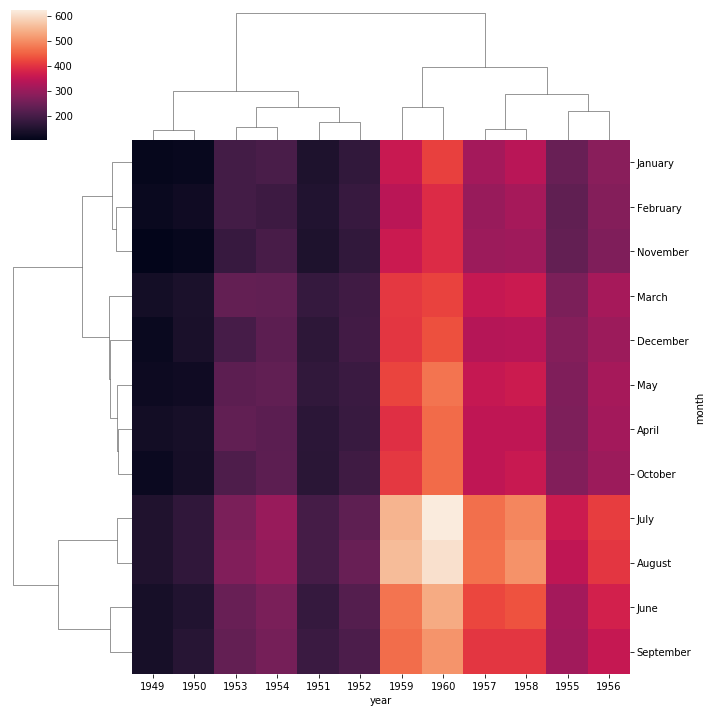

In [105]:
sn.clustermap(flight_pivot)

We can change the scale

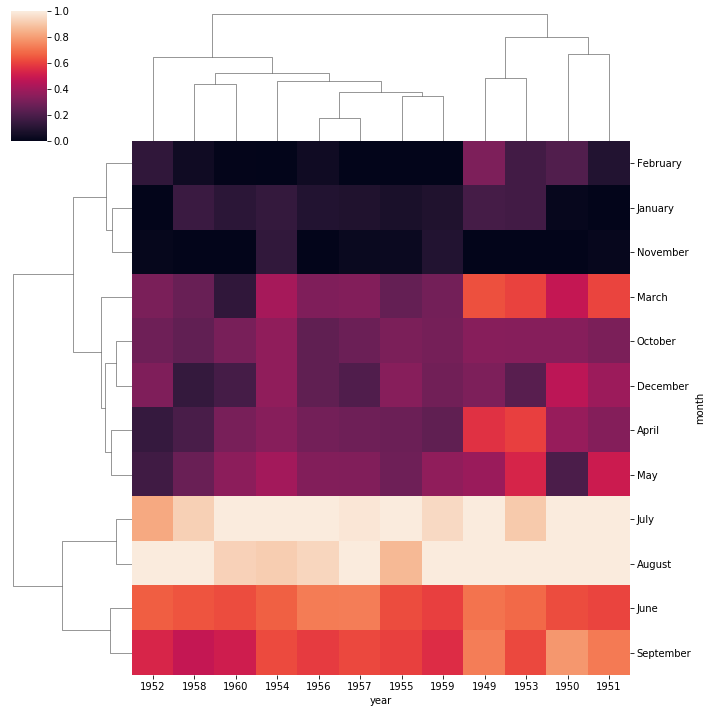

In [107]:
sn.clustermap(flight_pivot,standard_scale=1)

## Regression Plots

### LM Plots
We have seen this, with joint plot type regression

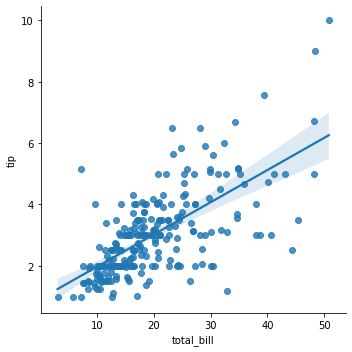

In [109]:
sn.lmplot(x='total_bill',y='tip',data=tips)

We can also add hue in this plot

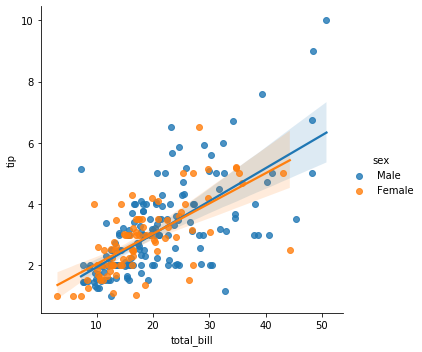

In [110]:
sn.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

 Changing marker types by adding markers parameter

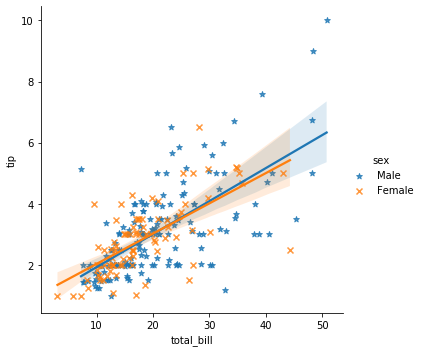

In [111]:
sn.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['*','x'])

Instead of Seperating both sexes by hue i.e color,  we can add col parameter with value we want to seperate<br>
Using columns are rows

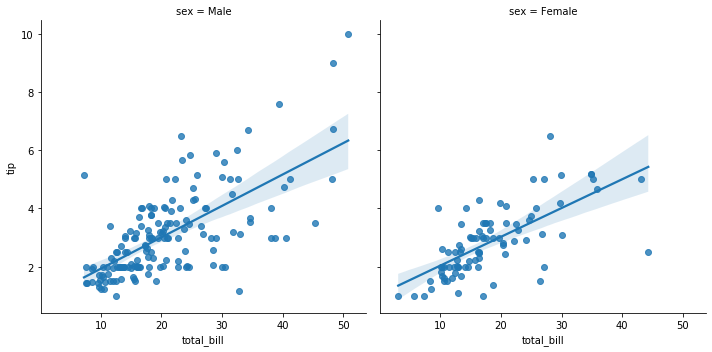

In [112]:
sn.lmplot(x='total_bill',y='tip',data=tips,col='sex')

Now Rows

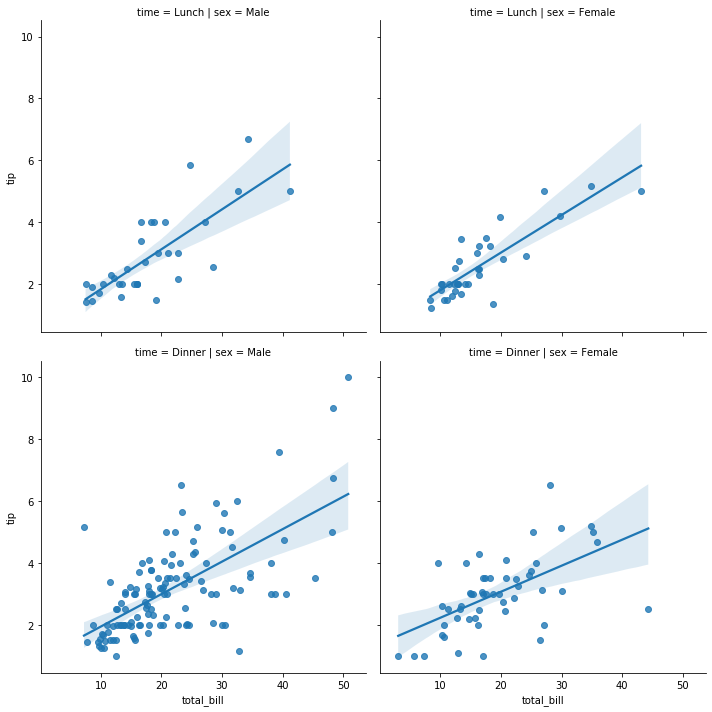

In [113]:
sn.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time')

We can also add hue now

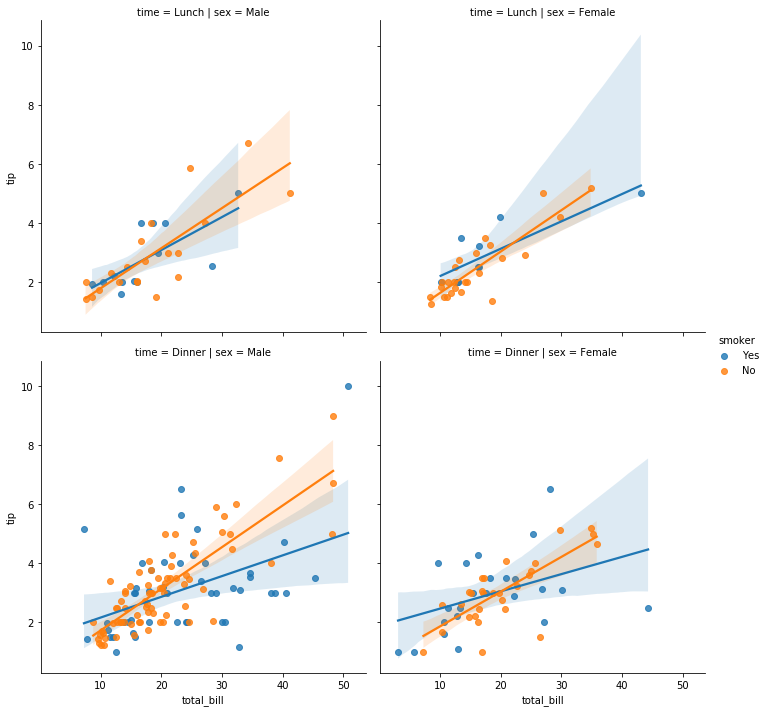

In [114]:
sn.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time',hue='smoker')

We can change the aspect ratio and height of the above figures

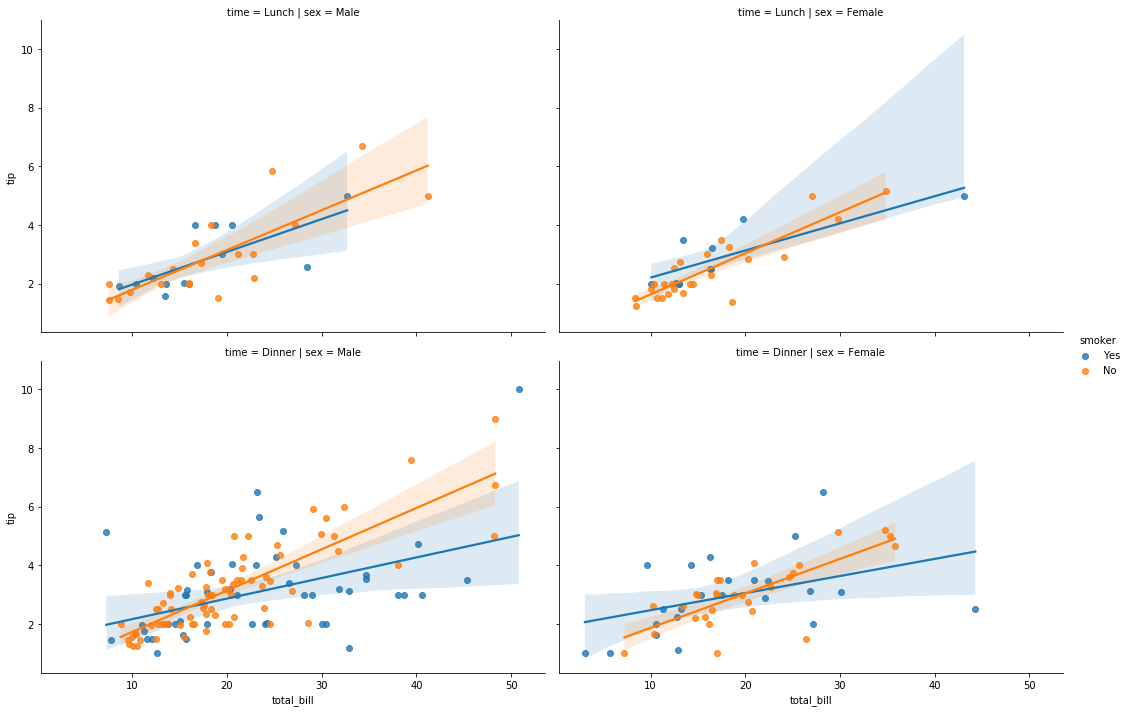

In [121]:
sn.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time',hue='smoker',aspect=1.5,height=5)

## Styles and Colors
set_style() method is used to change the style of grids

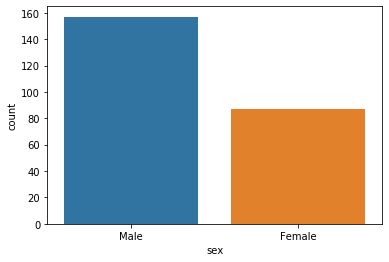

In [122]:
 sn.countplot(x='sex',data=tips)

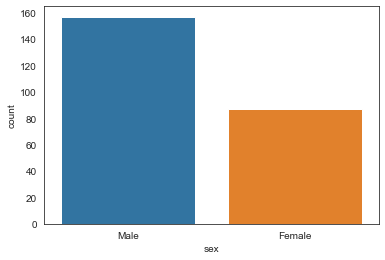

In [123]:
sn.set_style('white') 
sn.countplot(x='sex',data=tips)

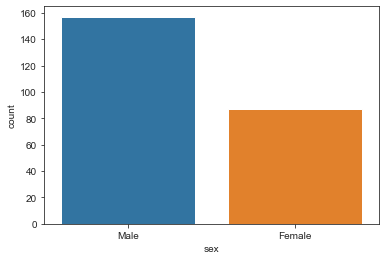

In [124]:
sn.set_style('ticks') 
sn.countplot(x='sex',data=tips)

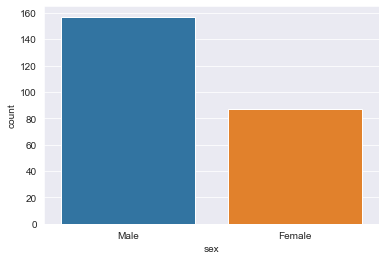

In [125]:
sn.set_style('darkgrid') 
sn.countplot(x='sex',data=tips)

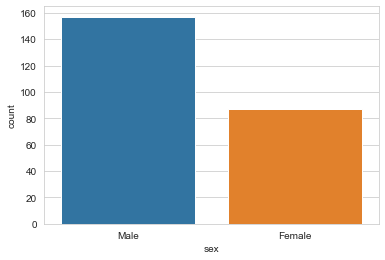

In [126]:
sn.set_style('whitegrid') 
sn.countplot(x='sex',data=tips)

Removing Spines

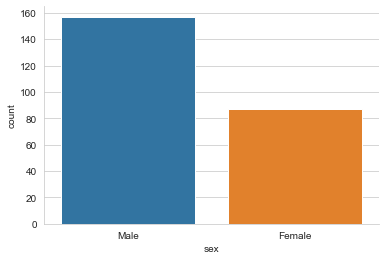

In [127]:
sn.countplot(x='sex',data=tips)
sn.despine()

We can remove the left and bottom spines too as follows:

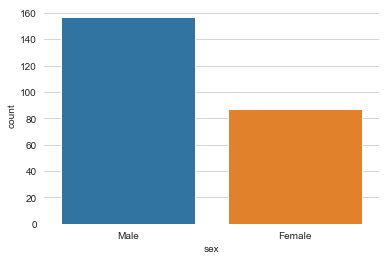

In [128]:
sn.countplot(x='sex',data=tips)
sn.despine(left=True,bottom=True)

### Size and Aspect
We can use matplotlib to change the size or we can add parameters to seaborn functions

- Using Matplotlib functions

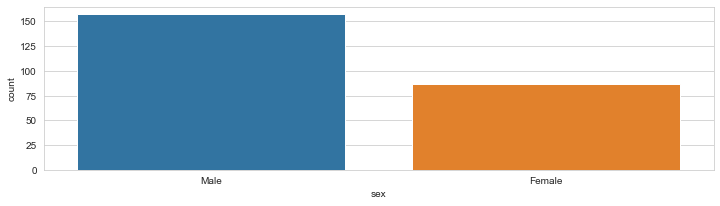

In [133]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
sn.countplot(x='sex',data=tips)

- Using seaborn methods 

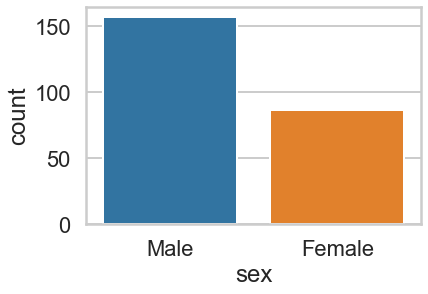

In [134]:
sn.set_context('poster')
sn.countplot(x='sex',data=tips)

 We can still increase font size by passing font_scale parameter in set_context method

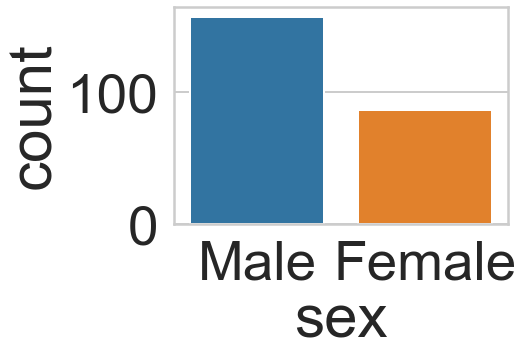

In [136]:
sn.set_context('poster',font_scale=2.5)
sn.countplot(x='sex',data=tips)

### Palettes and Colors

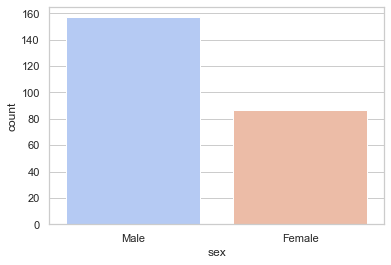

In [138]:
sn.set_context('notebook')
sn.countplot(x='sex',data=tips,palette = 'coolwarm')

We can pass the strings to palette to get different color scheme, we can get those strings from official matplotlib documentation